**ATP data and exploration**
- Mason Hansen
- 7/2/2019

In [1]:
#load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os
import glob
import re


In [2]:
types  ={"tourney_id": object, "tourney_name": object, "surface": object, "draw_size": object, 
       "tourney_level": object,"tourney_date": object, "match_num": object, 
        "winner_id":object, "winner_seed": float, "winner_entry": object, 
       "winner_name":object,"winner_hand": object, "winner_ht": float, "winner_ioc":object, 
       "winner_age": float, "winner_rank": float,"winner_rank_points": float,
       "loser_id": object, "loser_seed": float, "loser_entry": object,"loser_name": object,
        "loser_hand": object, "loser_ht": float, "loser_ioc": object, "loser_age": float, 
        "loser_rank": float, "loser_rank_points": float, "score": object, "best_of": float,
        "round": object, "minutes": float, "w_ace": float, "w_df": float, "w_svpt": float, "w_1stIn": float,
        "w_1stWon": float, "w_2ndWon": float, "w_SvGms": float, "w_bpSaved": float, "w_bpFaced": float,
        "l_ace": float, "l_df": float, "l_svpt": float, "l_1stIn": float, "l_1stWon": float, "l_2ndWon": float,
        "l_SvGms": float, "l_bpSaved": float, "l_bpFaced":float}

In [3]:
#load data
atp = "/Users/mason/Desktop/Data_Science_Projects/ATP/ATP.csv"
data = pd.read_csv(atp, dtype = types)
print(data.shape)
data.head()

(164028, 49)


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
0,1968-580,Australian Chps.,Grass,64,G,19680119,1,110023,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1968-580,Australian Chps.,Grass,64,G,19680119,2,109803,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1968-580,Australian Chps.,Grass,64,G,19680119,3,100257,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1968-580,Australian Chps.,Grass,64,G,19680119,4,100105,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1968-580,Australian Chps.,Grass,64,G,19680119,5,109966,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Management

* Each row contains information for both the winner and loser, making the dataframe a wide match-by-match dataframe.
* The goal is to split each row into two rows
* Each new row represents match data per player, with a win outcome column (1 = win, 0 = loss)
* After converting the wide data into tall data, I will feature engineer and clear the data

In [4]:
#List variable names that are standrard, winnner only or loser only
standardCategories = ['tourney_id','tourney_name','surface','draw_size',
                      'tourney_level','match_num','score','best_of','round','minutes','tourney_date']

winnerCategories = ['winner_id','winner_seed','winner_entry','winner_name',
                    'winner_hand','winner_ht','winner_ioc','winner_age','winner_rank',
                    'winner_rank_points','w_ace','w_df','w_svpt','w_1stIn','w_1stWon',
                    'w_2ndWon','w_SvGms','w_bpSaved','w_bpFaced']

loserCategories = ['loser_id','loser_seed','loser_entry','loser_name','loser_hand',
                   'loser_ht','loser_ioc','loser_age','loser_rank','loser_rank_points',
                   'l_ace','l_df','l_svpt','l_1stIn','l_1stWon','l_2ndWon','l_SvGms',
                   'l_bpSaved','l_bpFaced']



In [5]:
# Clean Data frame (go from wide, to tall, with predictive column "Win?")
newDf = pd.DataFrame()
tmpStandard = data[standardCategories]

In [6]:
tmpWinner = pd.concat([ tmpStandard, data[winnerCategories] ], axis = 1)
tmpWinner.rename({'winner_id': 'id','winner_seed': 'seed','winner_entry': 'entry','winner_name': 'name',
                    'winner_hand' : 'hand','winner_ht' : 'height','winner_ioc': 'ioc','winner_age':'age','winner_rank': 'rank',
                    'winner_rank_points': 'rank_points','w_ace':'aces','w_df':'double_fault','w_svpt': 'svpt','w_1stIn':'1stIn',
                  'w_1stWon': '1stWon','w_2ndWon': '2ndWon','w_SvGms': 'SvGms','w_bpSaved': 'bpSaved','w_bpFaced': 'bpFaced'},
                 axis = 'columns', inplace = True)
tmpWinner['win_outcome'] = 1
print(tmpWinner.shape)

(164028, 31)


In [7]:
tmpLoser = pd.concat([ tmpStandard, data[loserCategories] ], axis = 1)
tmpLoser.rename({'loser_id': 'id','loser_seed': 'seed','loser_entry': 'entry','loser_name': 'name',
                    'loser_hand' : 'hand','loser_ht' : 'height','loser_ioc': 'ioc','loser_age':'age','loser_rank': 'rank',
                    'loser_rank_points': 'rank_points','l_ace':'aces','l_df':'double_fault','l_svpt': 'svpt','l_1stIn':'1stIn',
                  'l_1stWon': '1stWon','l_2ndWon': '2ndWon','l_SvGms': 'SvGms','l_bpSaved': 'bpSaved','l_bpFaced': 'bpFaced'},
                 axis = 'columns', inplace = True)
tmpLoser['win_outcome'] = 0
print(tmpLoser.shape)

(164028, 31)


In [8]:
newDf = newDf.append(tmpWinner)
newDf = newDf.append(tmpLoser, sort = False)

In [9]:
print(newDf.shape)
newDf.head()


(328056, 31)


,tourney_id,tourney_name,surface,draw_size,tourney_level,match_num,score,best_of,round,minutes,...,aces,double_fault,svpt,1stIn,1stWon,2ndWon,SvGms,bpSaved,bpFaced,win_outcome
0,1968-580,Australian Chps.,Grass,64,G,1,12-10 7-5 4-6 7-5,5.0,R64,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,1968-580,Australian Chps.,Grass,64,G,2,6-3 6-2 6-4,5.0,R64,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1968-580,Australian Chps.,Grass,64,G,3,6-4 3-6 6-3 7-5,5.0,R64,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,1968-580,Australian Chps.,Grass,64,G,4,6-4 6-2 6-1,5.0,R64,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,1968-580,Australian Chps.,Grass,64,G,5,6-4 6-1 7-5,5.0,R64,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


## Cleaning up the "new" data

In [10]:
newDf.describe(include = 'all')

,tourney_id,tourney_name,surface,draw_size,tourney_level,match_num,score,best_of,round,minutes,...,aces,double_fault,svpt,1stIn,1stWon,2ndWon,SvGms,bpSaved,bpFaced,win_outcome
count,327930,327930,322796,327930,327930,327930,327580,327930.000000,327930,149754.000000,...,154800.000000,154800.000000,154800.000000,154800.000000,154800.000000,154800.000000,154800.000000,154800.000000,154800.000000,328056.000000
unique,7047,3532,4,16,6,316,20404,NaN,15,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1974-540,Wimbledon,Hard,32,A,1,6-4 6-4,NaN,R32,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,254,12446,127642,134688,213608,13946,9786,NaN,108212,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.451413,NaN,101.753436,...,5.548534,3.127804,79.212603,47.357603,33.515220,15.905872,12.226047,4.176072,6.985207,0.500000
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.836095,NaN,38.451462,...,4.981654,2.536162,29.565059,19.279102,14.259109,7.204778,4.098042,3.242735,4.468574,0.500001
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,74.000000,...,2.000000,1.000000,58.000000,34.000000,24.000000,11.000000,9.000000,2.000000,4.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,95.000000,...,4.000000,3.000000,74.000000,44.000000,31.000000,15.000000,11.000000,4.000000,6.000000,0.500000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,123.000000,...,8.000000,4.000000,95.000000,57.000000,41.000000,20.000000,15.000000,6.000000,10.000000,1.000000


In [11]:
print(newDf.columns)
newDf.isnull().sum()

Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'match_num', 'score', 'best_of', 'round', 'minutes', 'tourney_date',
       'id', 'seed', 'entry', 'name', 'hand', 'height', 'ioc', 'age', 'rank',
       'rank_points', 'aces', 'double_fault', 'svpt', '1stIn', '1stWon',
       '2ndWon', 'SvGms', 'bpSaved', 'bpFaced', 'win_outcome'],
      dtype='object')


tourney_id          126
tourney_name        126
surface            5260
draw_size           126
tourney_level       126
match_num           126
score               476
best_of             126
round               126
minutes          178302
tourney_date        126
id                  126
seed             233540
entry            290036
name                126
hand                208
height            47359
ioc                 126
age               10128
rank              52572
rank_points       52572
aces             173256
double_fault     173256
svpt             173256
1stIn            173256
1stWon           173256
2ndWon           173256
SvGms            173256
bpSaved          173256
bpFaced          173256
win_outcome           0
dtype: int64

In [12]:
#Change NaN's to zero for match stat columns
na_cols = ['rank', 'rank_points', 'aces', 'double_fault', 'svpt', '1stIn', '1stWon', '2ndWon', 'SvGms','bpSaved', 'bpFaced' ]
for i in na_cols:
    newDf[i] = newDf[i].fillna(0) 

In [13]:
#Replace nan's in score to 'no score'
#data['score'] = data.score.fillna('no score')
newDf.score.fillna('no score', inplace = True)

#Replace nan's entry to 'Reg'ular
newDf.entry.fillna('Reg', inplace = True)

In [14]:
patterns = ['RET', 'DEF', 'Walkover']
for pattern in patterns:
     newDf = newDf[~newDf.score.str.contains(pattern)] 

In [15]:
#Some Feture Engineering
def split_tourney_date(data):
    data['tourney_year'] = data.tourney_date.astype(str).str[:4]
    data['tourney_month'] = data.tourney_date.astype(str).str[4:6]
    data['tourney_day'] = data.tourney_date.astype(str).str[6:8]
    data['tourney_date_str'] = data.tourney_date.astype(str).str[:8]
    data["tourney_date_str"] = pd.to_datetime(data['tourney_date_str'])
    data.drop(['tourney_date'], axis = 1, inplace = True)

In [16]:
split_tourney_date(newDf)

In [17]:
#1991 is when they started keeping consistent detailed statstics of the matches
dataRich = newDf[newDf['tourney_year'].between('1991','2018')]
print(dataRich.shape)



(169116, 34)


## Grand Slam Data

    - For this analysis, I am only going to look at data from the 4 major Grand Slam tournaments
    

In [18]:
# Make a Grand Slam Dataframe
gsData = dataRich[dataRich.tourney_level == 'G']
print(gsData.shape)

(25682, 34)


In [19]:
gsData.describe(include = 'all')

,tourney_id,tourney_name,surface,draw_size,tourney_level,match_num,score,best_of,round,minutes,...,1stWon,2ndWon,SvGms,bpSaved,bpFaced,win_outcome,tourney_year,tourney_month,tourney_day,tourney_date_str
count,25682,25682,25682,25682,25682,25682,25682,25682.0,25682,22254.000000,...,25682.000000,25682.000000,25682.000000,25682.000000,25682.000000,25682.00000,25682,25682,25682,25682
unique,105,5,3,1,1,226,6544,NaN,7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27,4,19,105
top,1993-520,Australian Open,Hard,128,G,127,6-3 6-4 6-4,NaN,R128,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1993,01,25,2016-01-18 00:00:00
freq,254,6604,12896,25682,25682,210,276,NaN,12880,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,992,6604,2694,254
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1991-01-14 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-16 00:00:00
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,145.286960,...,49.564831,22.011526,17.311463,5.838058,9.696402,0.50000,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,45.895482,...,18.373421,9.035252,5.210732,3.996569,5.661443,0.50001,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,25.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,110.000000,...,38.000000,16.000000,14.000000,3.000000,6.000000,0.00000,NaN,NaN,NaN,NaN


## Functions (for fun & ease)

In [20]:
#Get match summary information
def match_summary(matches):
    summaryColumns = ['tourney_name','tourney_year', 'name', 'ioc', 'rank', 'score','minutes', 'win_outcome']
    matchSummary = matches[summaryColumns]
    return matchSummary

In [21]:
match_summary(gsData.sample(5))

,tourney_name,tourney_year,name,ioc,rank,score,minutes,win_outcome
106331,Wimbledon,1998,Martin Sinner,GER,115.0,6-2 6-2 6-4,96.0,0
116357,Wimbledon,2001,Antony Dupuis,FRA,69.0,6-4 5-7 6-7(2) 6-3 6-1,211.0,1
132576,US Open,2006,Andre Agassi,USA,39.0,6-4 6-4 3-6 5-7 7-5,225.0,1
141549,Australian Open,2009,Diego Junqueira,ARG,76.0,6-7(5) 7-6(3) 6-3 6-4,204.0,0
103644,Australian Open,1998,Petr Korda,CZE,7.0,6-2 7-6(8) 6-2,99.0,1


In [22]:
def get_player_data(data, player):
    global tmpPlayerData
    tmpPlayerData = data[(data.name == player)]
    print('Information for:', player, '\nVariable returned as: tmpPlayerData' )
    
    return tmpPlayerData.head()

                   

In [23]:
get_player_data(gsData, 'Roger Federer')


Information for: Roger Federer 
Variable returned as: tmpPlayerData


,tourney_id,tourney_name,surface,draw_size,tourney_level,match_num,score,best_of,round,minutes,...,1stWon,2ndWon,SvGms,bpSaved,bpFaced,win_outcome,tourney_year,tourney_month,tourney_day,tourney_date_str
110632,2000-560,US Open,Hard,128,G,83,6-1 7-6(5) 6-1,5.0,R64,92.0,...,48.0,18.0,14.0,4.0,4.0,1,2000,08,28,2000-08-28
110962,2000-580,Australian Open,Hard,128,G,52,6-4 6-4 7-6(5),5.0,R128,125.0,...,42.0,28.0,16.0,1.0,3.0,1,2000,01,17,2000-01-17
111000,2000-580,Australian Open,Hard,128,G,90,7-6(1) 6-2 6-3,5.0,R64,106.0,...,43.0,28.0,14.0,9.0,10.0,1,2000,01,17,2000-01-17
113281,2000-520,Roland Garros,Clay,128,G,50,7-6(4) 6-3 1-6 6-3,5.0,R128,147.0,...,59.0,31.0,19.0,11.0,13.0,1,2000,05,29,2000-05-29
113320,2000-520,Roland Garros,Clay,128,G,89,7-6(5) 6-3 6-3,5.0,R64,132.0,...,56.0,25.0,15.0,9.0,10.0,1,2000,05,29,2000-05-29


In [24]:
# Clean Data up again
gsData.loc[gsData.tourney_name == 'Us Open', 'tourney_name'] = 'US Open'
gsData.loc[gsData.best_of < 5., 'best_of'] = 5.
gsData.drop(['tourney_level','tourney_id', 'draw_size','id'], axis = 1,inplace = True)

/Users/mason/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/mason/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [25]:
gsData.describe(include = 'all')

,tourney_name,surface,match_num,score,best_of,round,minutes,seed,entry,name,...,1stWon,2ndWon,SvGms,bpSaved,bpFaced,win_outcome,tourney_year,tourney_month,tourney_day,tourney_date_str
count,25682,25682,25682,25682,25682.0,25682,22254.000000,8564.000000,25682,25682,...,25682.000000,25682.000000,25682.000000,25682.000000,25682.000000,25682.00000,25682,25682,25682,25682
unique,4,3,226,6544,NaN,7,NaN,NaN,4,1054,...,NaN,NaN,NaN,NaN,NaN,NaN,27,4,19,105
top,Australian Open,Hard,127,6-3 6-4 6-4,NaN,R128,NaN,NaN,Reg,Roger Federer,...,NaN,NaN,NaN,NaN,NaN,NaN,1993,01,25,2016-01-18 00:00:00
freq,6604,12896,210,276,NaN,12880,NaN,NaN,21872,365,...,NaN,NaN,NaN,NaN,NaN,NaN,992,6604,2694,254
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1991-01-14 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-16 00:00:00
mean,NaN,NaN,NaN,NaN,5.0,NaN,145.286960,12.438580,NaN,NaN,...,49.564831,22.011526,17.311463,5.838058,9.696402,0.50000,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,0.0,NaN,45.895482,8.882252,NaN,NaN,...,18.373421,9.035252,5.210732,3.996569,5.661443,0.50001,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,5.0,NaN,25.000000,1.000000,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,5.0,NaN,110.000000,5.000000,NaN,NaN,...,38.000000,16.000000,14.000000,3.000000,6.000000,0.00000,NaN,NaN,NaN,NaN


In [26]:
print(gsData.shape)
gsData.head()

(25682, 30)


,tourney_name,surface,match_num,score,best_of,round,minutes,seed,entry,name,...,1stWon,2ndWon,SvGms,bpSaved,bpFaced,win_outcome,tourney_year,tourney_month,tourney_day,tourney_date_str
77543,Wimbledon,Grass,1,6-4 6-4 6-4,5.0,R128,87.0,1.0,Reg,Stefan Edberg,...,43.0,17.0,15.0,0.0,0.0,1,1991,06,24,1991-06-24
77544,Wimbledon,Grass,2,4-6 6-7(4) 6-4 6-2 6-3,5.0,R128,NaN,NaN,Reg,David Pate,...,0.0,0.0,0.0,0.0,0.0,1,1991,06,24,1991-06-24
77545,Wimbledon,Grass,3,6-4 6-3 6-3,5.0,R128,135.0,NaN,Reg,Wayne Ferreira,...,32.0,24.0,14.0,4.0,6.0,1,1991,06,24,1991-06-24
77546,Wimbledon,Grass,4,6-1 7-6(2) 4-6 6-4,5.0,R128,158.0,NaN,Reg,Christo Van Rensburg,...,51.0,29.0,19.0,5.0,9.0,1,1991,06,24,1991-06-24
77547,Wimbledon,Grass,5,6-4 6-4 6-3,5.0,R128,106.0,NaN,Reg,Horst Skoff,...,36.0,19.0,14.0,7.0,10.0,1,1991,06,24,1991-06-24


In [27]:
#Check the minutes column for consistency 
match_summary(gsData.iloc[np.where(gsData.minutes < 50)]).head() #seems off

,tourney_name,tourney_year,name,ioc,rank,score,minutes,win_outcome
84582,Wimbledon,1993,Jamie Morgan,AUS,58.0,6-3 6-4 4-6 6-4,26.0,1
84583,Wimbledon,1993,Byron Black,ZIM,108.0,6-2 6-7(7) 6-1 6-1,49.0,1
84588,Wimbledon,1993,Luis Herrera,MEX,86.0,4-6 4-6 6-3 6-3 6-3,47.0,1
84599,Wimbledon,1993,Mark Petchey,GBR,226.0,6-4 6-7(8) 6-1 6-1,27.0,1
84601,Wimbledon,1993,David Prinosil,GER,88.0,7-6(3) 6-3 7-6(3),38.0,1


In [28]:
#Remove any match with less than 45 minutes
gsData = gsData.iloc[np.where(gsData.minutes >= 60)]
gsData.shape

(22136, 30)

## Visuals

In [29]:
#Seaborn
import seaborn as sns

In [30]:
numData = gsData.select_dtypes(include = ['float64'])
numData.columns

Index(['best_of', 'minutes', 'seed', 'height', 'age', 'rank', 'rank_points',
       'aces', 'double_fault', 'svpt', '1stIn', '1stWon', '2ndWon', 'SvGms',
       'bpSaved', 'bpFaced'],
      dtype='object')

In [31]:
def hide_current_axis(*args, **kwds):
    plt.gca().set_visible(False)

/Users/mason/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/mason/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


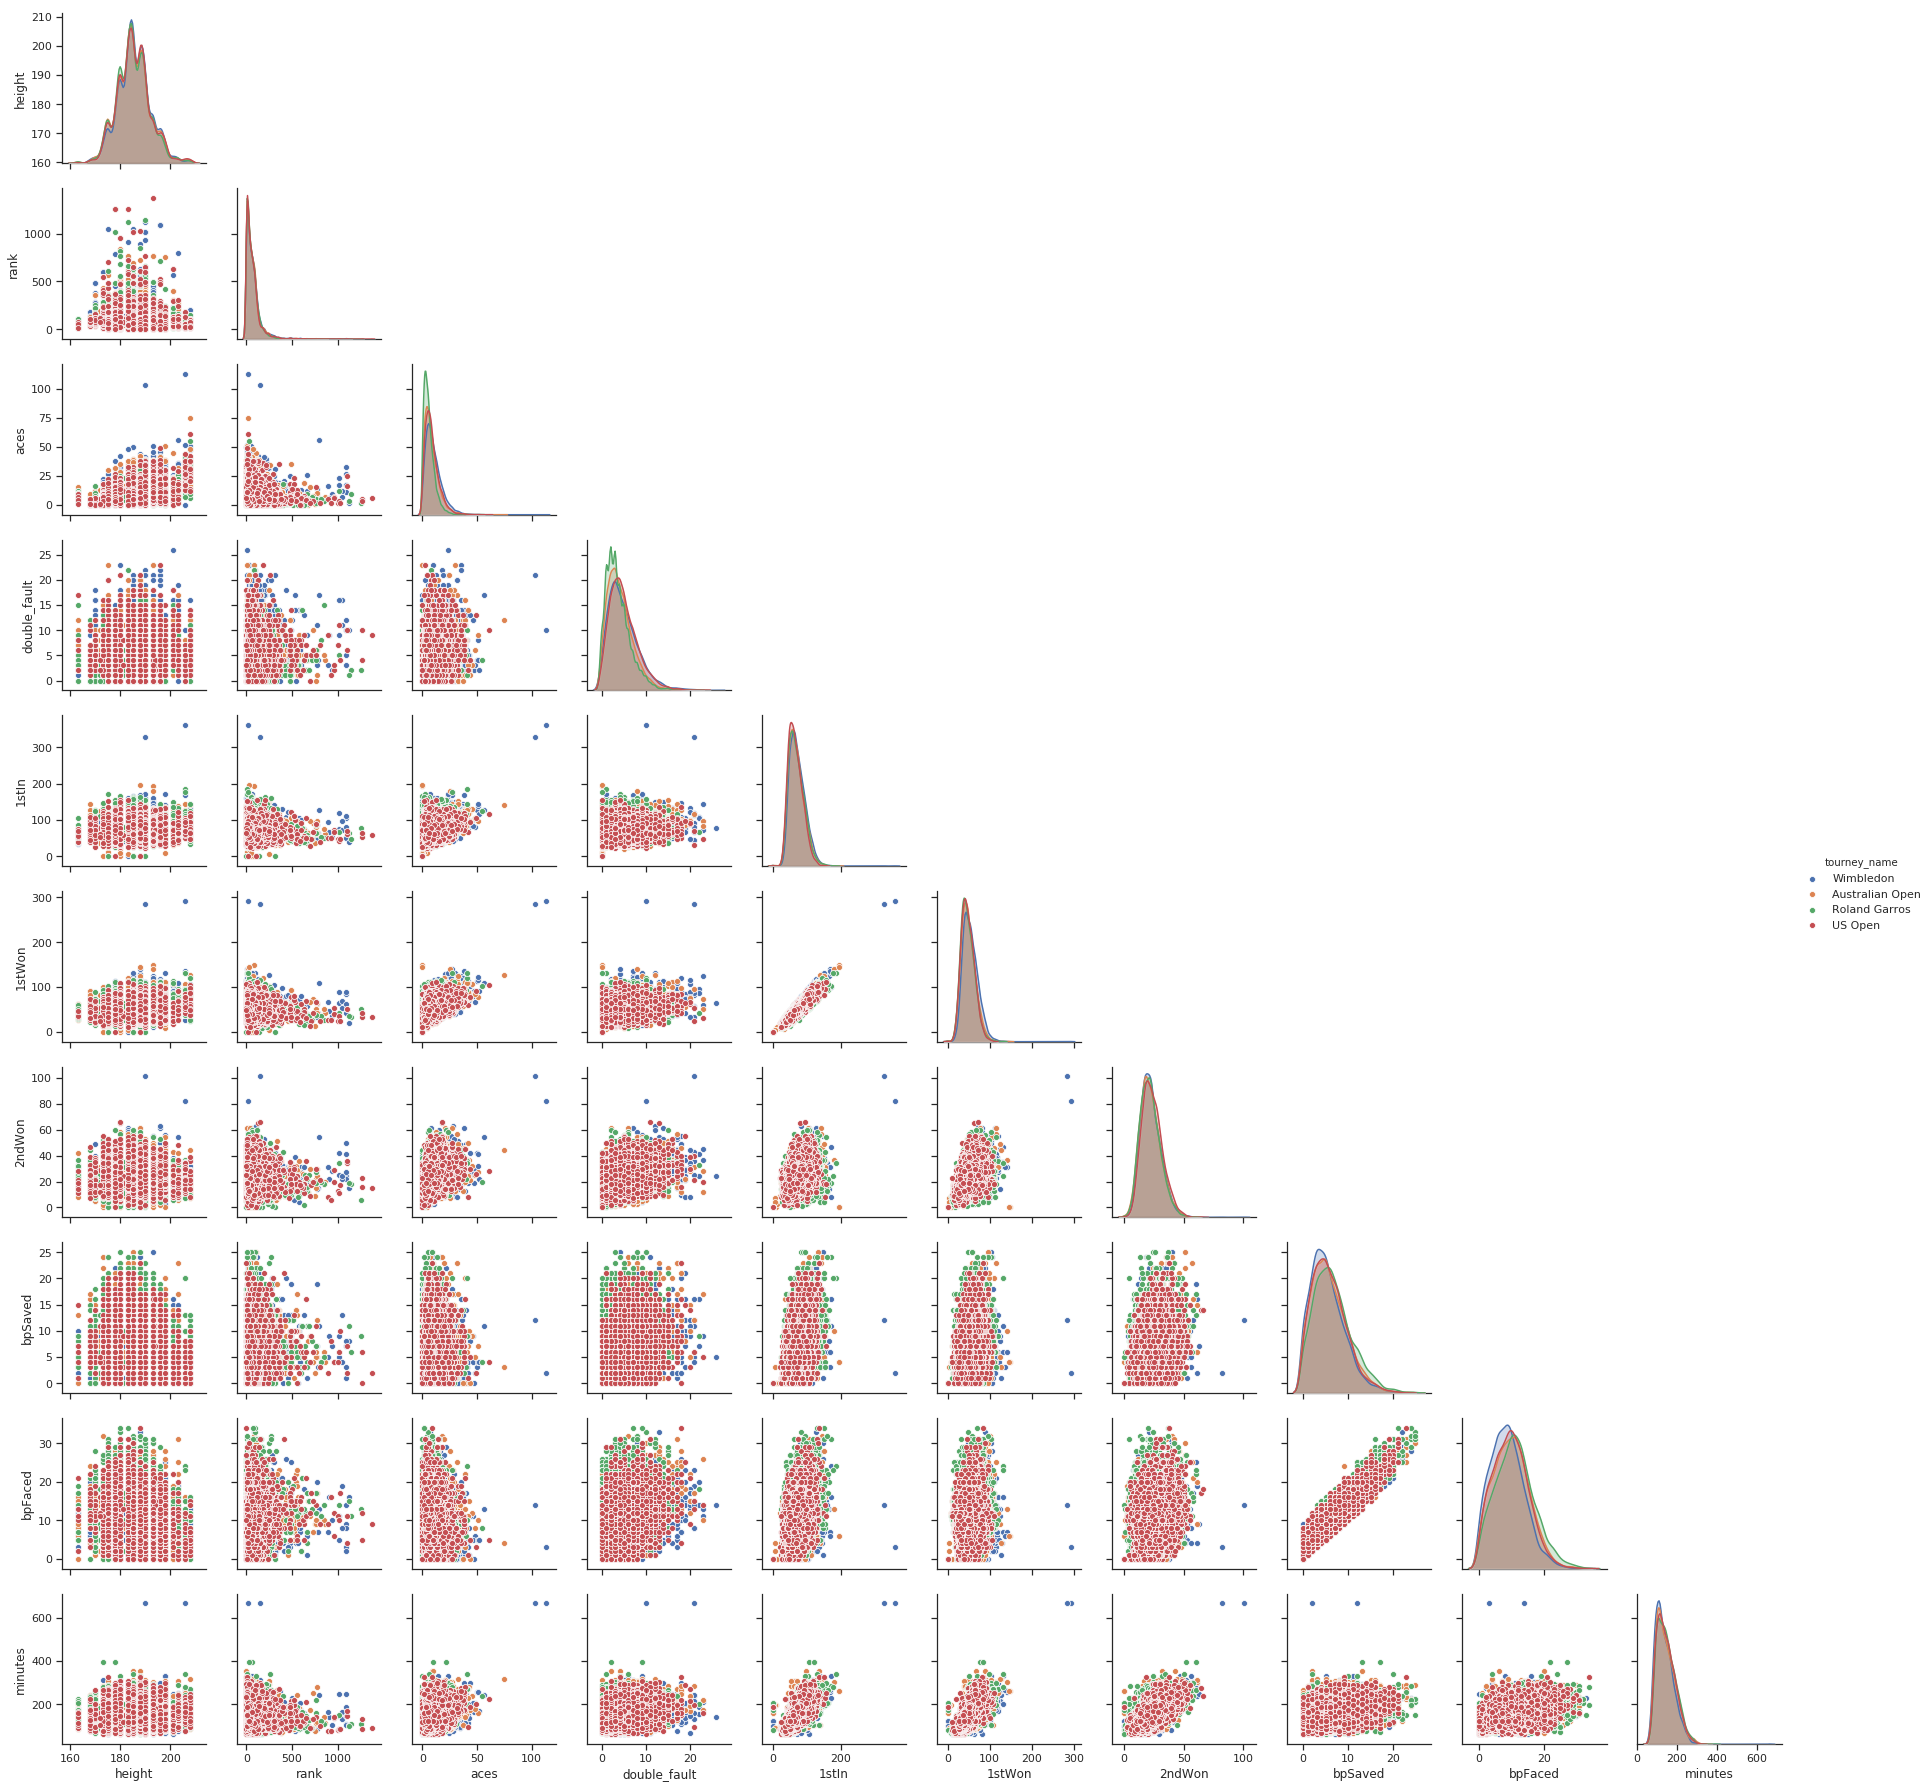

In [32]:
sns.set(style="ticks", color_codes=True)
pairPlot1 = sns.pairplot(gsData, 
                         vars = ['height', 'rank','aces', 'double_fault', 
                                 '1stIn', '1stWon', '2ndWon', 'bpSaved', 'bpFaced', 'minutes'], 
                         hue = 'tourney_name' )

for i, j in zip(*np.triu_indices_from(pairPlot1.axes, 1)):
    pairPlot1.axes[i, j].set_visible(False)


In [33]:
#Find those two points that always look like outliers
outliersIndex = np.where(gsData.aces >80)[0]
outliers = gsData.iloc[outliersIndex]
match_summary(outliers)

,tourney_name,tourney_year,name,ioc,rank,score,minutes,win_outcome
142931,Wimbledon,2010,John Isner,USA,19.0,6-4 3-6 6-7(7) 7-6(3) 70-68,665.0,1
142931,Wimbledon,2010,Nicolas Mahut,FRA,148.0,6-4 3-6 6-7(7) 7-6(3) 70-68,665.0,0


Text(0, 0.5, ' Age - AVG')

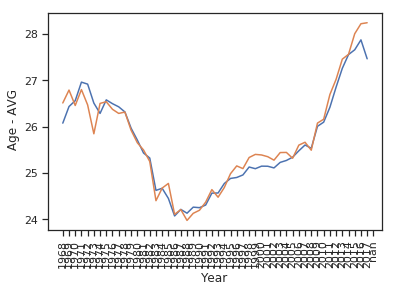

In [34]:
#Age 
fig, ax = plt.subplots()
ax.plot(newDf.groupby('tourney_year').age.mean())
grandSlams = newDf[newDf.tourney_level == 'G']
ax.plot(grandSlams.groupby('tourney_year').age.mean())
plt.xticks(rotation = 90)
ax.set_xlabel('Year'); ax.set_ylabel(' Age - AVG')

Text(0, 0.5, 'Height')

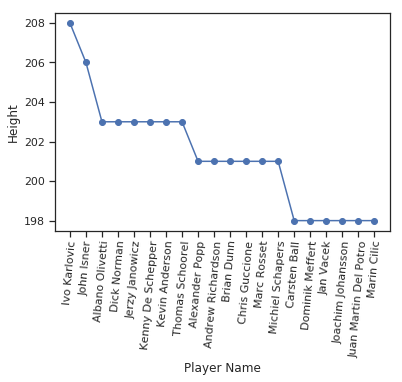

In [35]:
#Height
fig, ax = plt.subplots()
ax.plot(gsData.groupby('name').height.mean().nlargest(20), marker = 'o')
plt.xticks(rotation = 85)
ax.set_xlabel('Player Name'); ax.set_ylabel('Height')

Text(0, 0.5, 'Win %')

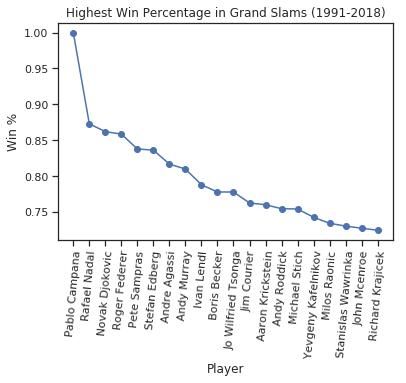

In [36]:
# Highets Win Percentage in grand slams
fig, ax = plt.subplots()
ax.plot(gsData.groupby('name').win_outcome.mean().nlargest(20), marker = 'o')
plt.xticks(rotation=85)
plt.title('Highest Win Percentage in Grand Slams (1991-2018)')
ax.set_xlabel('Player'); ax.set_ylabel('Win %')


Text(0, 0.5, 'Minutes')

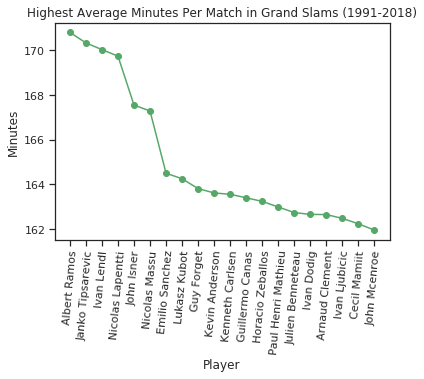

In [37]:
#Highest Average Minutes per match in grandslams
fig, ax = plt.subplots()
ax.plot(gsData.groupby('name').filter(lambda x: x['tourney_name'].count() > 20.).groupby('name').minutes.mean().nlargest(20), marker = 'o', color = 'g')
plt.xticks(rotation=85)
plt.title('Highest Average Minutes Per Match in Grand Slams (1991-2018)')
ax.set_xlabel('Player'); ax.set_ylabel('Minutes')

Text(0, 0.5, 'Minutes')

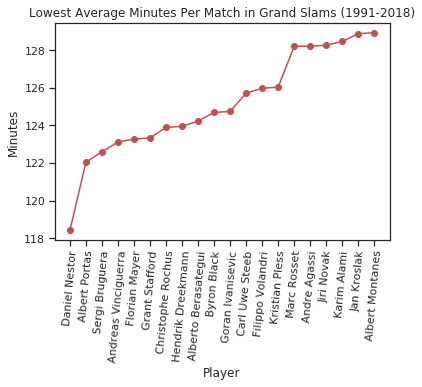

In [38]:
#Lowest Average Minutes per match in grandslams
fig, ax = plt.subplots()
ax.plot(gsData.groupby('name').filter(lambda x: x['tourney_name'].count() > 20.).groupby('name').minutes.mean().nsmallest(20), marker = 'o', color = 'r')
plt.xticks(rotation=85)
plt.title('Lowest Average Minutes Per Match in Grand Slams (1991-2018)')
ax.set_xlabel('Player'); ax.set_ylabel('Minutes')

Text(0, 0.5, 'Minutes')

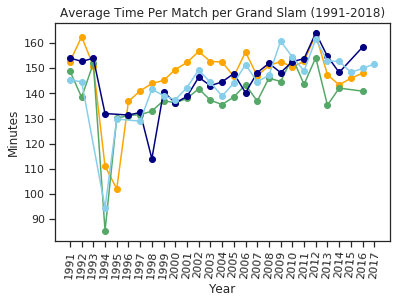

In [39]:
#Visualizations by Tournament
fig, ax = plt.subplots()
ax.plot(gsData[gsData.tourney_name == 'Roland Garros'].groupby('tourney_year').minutes.mean(), marker = 'o', color = 'orange')
ax.plot(gsData[gsData.tourney_name == 'Wimbledon'].groupby('tourney_year').minutes.mean(), marker = 'o', color = 'g')
ax.plot(gsData[gsData.tourney_name == 'US Open'].groupby('tourney_year').minutes.mean(), marker = 'o', color = 'navy')
ax.plot(gsData[gsData.tourney_name == 'Australian Open'].groupby('tourney_year').minutes.mean(), marker = 'o', color = 'skyblue')
plt.xticks(rotation=85)
plt.title('Average Time Per Match per Grand Slam (1991-2018)')
ax.set_xlabel('Year'); ax.set_ylabel('Minutes')

## Predictive Modeling

Coming Soon!